- Define your own problem based on the two datasets we explored in class (airports.dat and routes.dat)

  Note that there are many more features (columns) in the datasets.

- Solve the problem using Python programming

- Display the results of your problem using graphs (using Matplotlib.pyplot or Seaborn library)

- Everything should be in the Notebook file (no separated documentation required)

# Lab1 2019707033 김태윤

## 정의한 문제
    
- 남북한 각각의 항공 운항 관련 정보를 수집하고, 두 자료의 크기를 서로 비교하라.

## 구현

- airports.dat에서 해당하는 IATA 데이터를 모은 리스트를 생성
- routes.dat에서 source 또는 destination의 IATA를 위에서 수집한 리스트에서 탐색
- 리스트에서 발견되면 해당 국가에 관련된 항로임을 확인

In [96]:
import matplotlib.pyplot as plt
import csv

In [97]:
# 사용할 변수
size_airport_south = 0
size_airport_north = 0

# 공항 데이터 가져오기

airports.dat

> Airport ID, Name, City, Country, IATA, ICAO, Latitude, Longitude, Altitude, Timezone, DST, Tz database, timezone, Type, Source

- We mainly use
    - Airport ID, Name, Country, IATA, ICAO    (0, 1, 3, 4, 5)

In [98]:
!curl -o airports.dat https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 24 1100k   24  272k    0     0   698k      0  0:00:01 --:--:--  0:00:01  696k
100 1100k  100 1100k    0     0  1997k      0 --:--:-- --:--:-- --:--:-- 1994k


In [99]:
# 들어온 데이터 확인
f = open("airports.dat", encoding='UTF-8')
for row in csv.reader(f):
    print("{0:<5} | {1:<70} | {2:<} | {3:<5} | {4:<}".format(row[0], row[1], row[3], row[4], row[5]))

1     | Goroka Airport                                                         | Papua New Guinea | GKA   | AYGA
2     | Madang Airport                                                         | Papua New Guinea | MAG   | AYMD
3     | Mount Hagen Kagamuga Airport                                           | Papua New Guinea | HGU   | AYMH
4     | Nadzab Airport                                                         | Papua New Guinea | LAE   | AYNZ
5     | Port Moresby Jacksons International Airport                            | Papua New Guinea | POM   | AYPY
6     | Wewak International Airport                                            | Papua New Guinea | WWK   | AYWK
7     | Narsarsuaq Airport                                                     | Greenland | UAK   | BGBW
8     | Godthaab / Nuuk Airport                                                | Greenland | GOH   | BGGH
9     | Kangerlussuaq Airport                                                  | Greenland | SFJ   | BGSF
10  

In [100]:
# 남한 공항 데이터 처리
list_airport_south = []
f = open("airports.dat", encoding='UTF-8')
for row in csv.reader(f):
    if row[3] == "South Korea":
        print("{0:<5} | {1:<70} | {2:<} | {3:<5} | {4:<}".format(row[0], row[1], row[3], row[4], row[5]))
        list_airport_south.append(row[4])
print("Airports of South Korea : ", len(list_airport_south))

2361  | Gwangju Airport                                                        | South Korea | KWJ   | RKJJ
2364  | Jeon Ju Airport (G-703)                                                | South Korea | CHN   | RKJU
2365  | Yeosu Airport                                                          | South Korea | RSU   | RKJY
2366  | Sokcho Airport                                                         | South Korea | \N    | RKND
2367  | Gangneung Airport (K-18)                                               | South Korea | KAG   | RKNN
2370  | Jeju International Airport                                             | South Korea | CJU   | RKPC
2371  | Jinhae Airbase/Airport (G-813/K-10)                                    | South Korea | CHF   | RKPE
2372  | Gimhae International Airport                                           | South Korea | PUS   | RKPK
2374  | Ulsan Airport                                                          | South Korea | USN   | RKPU
2375  | A 511 Airport       

In [101]:
# 북한 공항 데이터 처리
list_airport_north = []
f = open("airports.dat", encoding='UTF-8')
for row in csv.reader(f):
    if row[3] == "North Korea":
        print("{0:<5} | {1:<70} | {2:<} | {3:<5} | {4:<}".format(row[0], row[1], row[3], row[4], row[5]))
        list_airport_north.append(row[4])
print("Airports of North Korea : ", len(list_airport_north))

3377  | Pyongyang Sunan International Airport                                  | North Korea | FNJ   | ZKPY
8785  | Sondok Airport                                                         | North Korea | DSO   | ZKSD
8830  | Orang Airport                                                          | North Korea | RGO   | ZKHM
10949 | Wonsan Kalma International Airport                                     | North Korea | WOS   | ZKWS
12049 | Sunchon Air Base                                                       | North Korea | \N    | ZKSC
Airports of North Korea :  5


# 항로 데이터 가져오기

routes.dat

> Airline, Airline ID, Source airport, Source airport ID, Destination airport, Destionation airport ID, Codeshare, Stops, Equipment

In [102]:
!curl -o routes.dat https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 22 2321k   22  512k    0     0  1030k      0  0:00:02 --:--:--  0:00:02 1028k
100 2321k  100 2321k    0     0  3330k      0 --:--:-- --:--:-- --:--:-- 3325k


In [103]:
# 들어온 데이터 확인
f = open("routes.dat", encoding='UTF-8')
for row in csv.reader(f):
    print("{0:<5} | {1:<5} | {2:<5}".format(row[1], row[2], row[4]))

410   | AER   | KZN  
410   | ASF   | KZN  
410   | ASF   | MRV  
410   | CEK   | KZN  
410   | CEK   | OVB  
410   | DME   | KZN  
410   | DME   | NBC  
410   | DME   | TGK  
410   | DME   | UUA  
410   | EGO   | KGD  
410   | EGO   | KZN  
410   | GYD   | NBC  
410   | KGD   | EGO  
410   | KZN   | AER  
410   | KZN   | ASF  
410   | KZN   | CEK  
410   | KZN   | DME  
410   | KZN   | EGO  
410   | KZN   | LED  
410   | KZN   | SVX  
410   | LED   | KZN  
410   | LED   | NBC  
410   | LED   | UUA  
410   | MRV   | ASF  
410   | NBC   | DME  
410   | NBC   | GYD  
410   | NBC   | LED  
410   | NBC   | SVX  
410   | NJC   | SVX  
410   | NJC   | UUA  
410   | NUX   | SVX  
410   | OVB   | CEK  
410   | OVB   | SVX  
410   | SVX   | KZN  
410   | SVX   | NBC  
410   | SVX   | NJC  
410   | SVX   | NUX  
410   | SVX   | OVB  
410   | TGK   | DME  
410   | UUA   | DME  
410   | UUA   | LED  
410   | UUA   | NJC  
1654  | BTK   | IKT  
1654  | BTK   | OVB  
1654  | CEK   | OVB  
1654  | HT

In [104]:
# 남한 항공편 데이터 처리
size_routes_south = 0
f = open("routes.dat", encoding='UTF-8')
for row in csv.reader(f):
    if (row[2] in list_airport_south) or (row[4] in list_airport_south):
        print("{0:<5} | {1:<5} | {2:<5}".format(row[1], row[2], row[4]))
        size_routes_south += 1
print("Associated routes of South Korea : ", size_routes_south)

4608  | CTU   | ICN  
4608  | ICN   | CTU  
1683  | CEB   | ICN  
1683  | CEB   | PUS  
1683  | ICN   | CEB  
1683  | ICN   | KLO  
1683  | ICN   | MNL  
1683  | KLO   | ICN  
1683  | MNL   | ICN  
1683  | MNL   | PUS  
1683  | PUS   | CEB  
1683  | PUS   | MNL  
2994  | BKK   | ICN  
2994  | BKK   | PUS  
2994  | CEB   | ICN  
2994  | CEB   | PUS  
2994  | CJJ   | CJU  
2994  | CJU   | CJJ  
2994  | CJU   | GMP  
2994  | CJU   | PUS  
2994  | FUK   | ICN  
2994  | GMP   | CJU  
2994  | GMP   | KIX  
2994  | GMP   | NGO  
2994  | GUM   | ICN  
2994  | HKG   | ICN  
2994  | ICN   | BKK  
2994  | ICN   | CEB  
2994  | ICN   | FUK  
2994  | ICN   | GUM  
2994  | ICN   | HKG  
2994  | ICN   | KIX  
2994  | ICN   | MNL  
2994  | ICN   | NGO  
2994  | ICN   | NRT  
2994  | ICN   | TAO  
2994  | KIX   | GMP  
2994  | KIX   | ICN  
2994  | MNL   | ICN  
2994  | NGO   | GMP  
2994  | NGO   | ICN  
2994  | NRT   | ICN  
2994  | PUS   | BKK  
2994  | PUS   | CJU  
2994  | TAO   | ICN  
17408 | BK

In [105]:
# 북한 항공편 데이터 처리
size_routes_north = 0
f = open("routes.dat", encoding='UTF-8')
for row in csv.reader(f):
    if (row[2] in list_airport_north) or (row[4] in list_airport_north):
        print("{0:<5} | {1:<5} | {2:<5}".format(row[1], row[2], row[4]))
        size_routes_north += 1
print("Associated routes of North Korea : ", size_routes_north)

751   | FNJ   | PEK  
751   | PEK   | FNJ  
998   | FNJ   | KUL  
998   | FNJ   | PEK  
998   | FNJ   | SHE  
998   | FNJ   | VVO  
998   | KUL   | FNJ  
998   | PEK   | FNJ  
998   | SHE   | FNJ  
998   | VVO   | FNJ  
Associated routes of North Korea :  10


# 공항 개수 비교

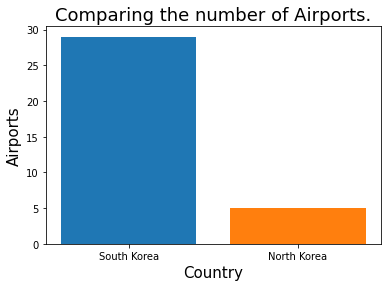

In [106]:
plt.bar("South Korea", len(list_airport_south))
plt.bar("North Korea", len(list_airport_north))
plt.title("Comparing the number of Airports.", fontsize=18)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Airports", fontsize=15)
plt.show()

# 항공편 개수 비교

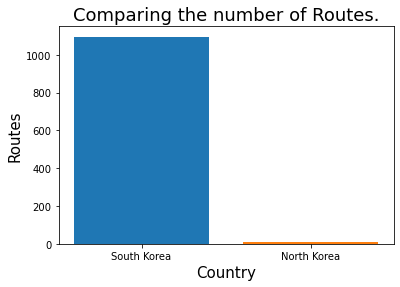

In [107]:
plt.bar("South Korea", size_routes_south)
plt.bar("North Korea", size_routes_north)
plt.title("Comparing the number of Routes.", fontsize=18)
plt.xlabel("Country", fontsize=15)
plt.ylabel("Routes", fontsize=15)
plt.show()